# Numerical Differentiation

This notebook will walk you through writing your own function to differentiate a function numerically. This is important for implementing differential equation solvers and for processing data where you'd like to know about how a measured quantity changes as a function of some independent variable (typically time).

## Finite differences for the first derivative
The central issue of numerical differentiation is that a computer can only represent finitely many points, so we cannot truly take a limit as is required in the definition of the derivative:
$ f'(x) = \lim_{h\to 0} {f(x+h) - f(x) \over h} $

Suppose we have a set of samples of a function $f$ at points $\{x_1, \dots, x_n\}$ which we assume are strictly increasing ($x_1 < x_2 < \dots < x_n$). The most direct approach to estimating the derivative is to use _finite differences_, the essential idea being to take differences of function values at adjacent $x$-values. This can be done in several ways:

1. Forward difference:
$$ f'_{f}(x_i) \approx {f(x_{i+1}) - f(x_i) \over x_{i+1} - x_i} $$

2. Backward difference:
$$ f'_{b}(x_i) \approx {f(x_{i}) - f(x_{i-1}) \over x_i - x_{i-1}} $$

Assuming the grid spacing is equal (i.e. $x_{i+1} - x_i = h$ for all $i$), one can also take the average of the forward and backward difference estimates to get

3. Centered difference:
$$ f'_{c}(x_i) \approx {f(x_{i+1}) - f(x_{i-1}) \over 2 h} $$

A key feature of a finite difference approximation is its _order of accuracy_. The order of accuracy determines how the error of the approximation scales with the grid spacing. The errors in the above three finite-difference approximations is:
$$
\begin{align}
f'_{f}(x_i) - f'(x_i) &\in \mathcal{O}(h) \\
f'_{b}(x_i) - f'(x_i) &\in \mathcal{O}(h) \\
f'_{c}(x_i) - f'(x_i) &\in \mathcal{O}(h^2) \\
\end{align}
$$

Note that the central difference approximation is much more accurate than either the forward or backward difference when $h$ is small. This is because the forward and backward difference approximations make errors that cancel out when averaged to obtain the centered difference.

Note also that care must be taken at the first and/or last grid points: when $i=1$, $x_{i-1}$ is not available. A common choice is to always use the forward difference for $i=1$ and always use the backward difference when $i=n$.

**Exercise**: Implement the above finite difference schemes for a function of one variable.

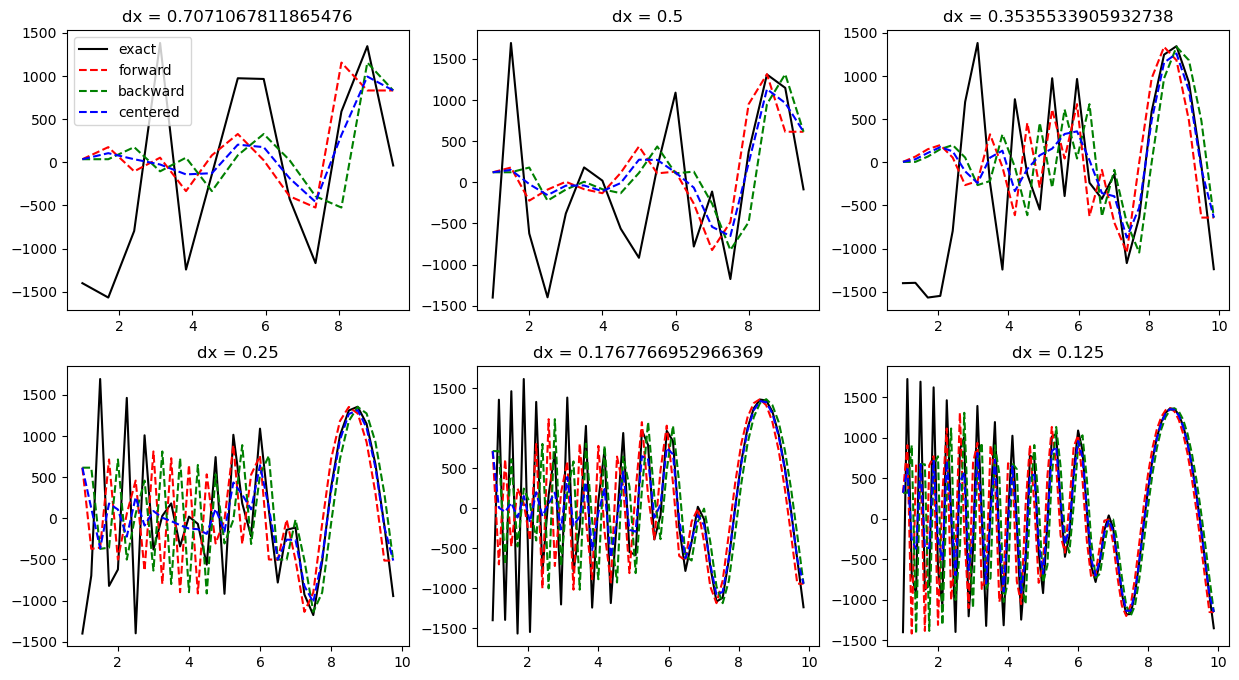

In [7]:
import numpy as np
# Implement finite differences
def forward_difference(f, dx):
    """
    gives the forward difference approximation of the derivative of f with respect to x

    INPUT:
        f = array of function values sampled at successive x points (f(a), f(a+dx), f(a+2dx), ...)
        dx = scalar, the spacing between successive x points

    OUTPUT:
        df = array of the same shape as f giving an approxmation to df/dx at the same x points as f was sampled at
    """
    dfdx = np.zeros_like(f)
    dfdx[:-1] = (f[1:] - f[:-1]) / dx
    dfdx[:-1] = np.diff(f)
    # use backward difference for the last point
    dfdx[-1] = (f[-1] - f[-2]) / dx

    for i in range(0, len(f)-1):
        dfdx[i] = (f[i+1] - f[i])/dx
    return dfdx # replace this with your own code

def backward_difference(f, dx):
    """
    gives the backward difference approximation of the derivative of f with respect to x

    INPUT:
        f = array of function values sampled at successive x points (f(a), f(a+dx), f(a+2dx), ...)
        dx = scalar, the spacing between successive x points

    OUTPUT:
        df = array of the same shape as f giving an approxmation to df/dx at the same x points as f was sampled at
    """
    dfdx = np.zeros_like(f)
    dfdx[1:] = np.diff(f)
    dfdx[1:] = (f[1:] - f[:-1]) / dx
    # use forward difference for the first point
    dfdx[0] = (f[1] - f[0]) / dx
    return dfdx

def centered_difference(f, dx):
    """
    gives the centered difference approximation of the derivative of f with respect to x

    INPUT:
        f = array of function values sampled at successive x points (f(a), f(a+dx), f(a+2dx), ...)
        dx = scalar, the spacing between successive x points

    OUTPUT:
        df = array of the same shape as f giving an approxmation to df/dx at the same x points as f was sampled at
    """
    dfdx = np.zeros_like(f)
    dfdx[1:-1] = (f[2:] - f[:-2])/(2*dx)
    dfdx[0] = (f[1]-f[0])/dx
    dfdx[-1] = (f[-1]-f[-2])/dx
    return dfdx

test_fun = lambda x : 100*np.sin((10-x)**2) + x**3 * np.cos(2*x)
# computed by hand; check this!
test_fun_deriv = lambda x : -200*(10-x)*np.cos((10-x)**2) + 3*x**2*np.cos(x*2) - 2*x**3*np.sin(x*2)
a = 1
b = 10

dx_test_vals = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
dx_test_vals = 2**np.linspace(-0.5, -3, 6)

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 8))
for j, dx in enumerate(dx_test_vals):
    xvals = np.arange(a, b, dx)
    fvals = np.array(test_fun(xvals))
    fwd_approx = forward_difference(fvals, dx)
    bkd_approx = backward_difference(fvals, dx)
    ctr_approx = centered_difference(fvals, dx)
    # compute the true derivative
    exact = test_fun_deriv(xvals)
    plt.subplot(2, 3, j+1)
    plt.plot(xvals, exact, 'k', label='exact')
    plt.plot(xvals, fwd_approx, 'r--', label='forward')
    plt.plot(xvals, bkd_approx, 'g--', label='backward')
    plt.plot(xvals, ctr_approx, 'b--', label='centered')
    plt.title(f'dx = {dx}')
    if j==0:
        plt.legend()

Text(0, 0.5, 'mean square error')

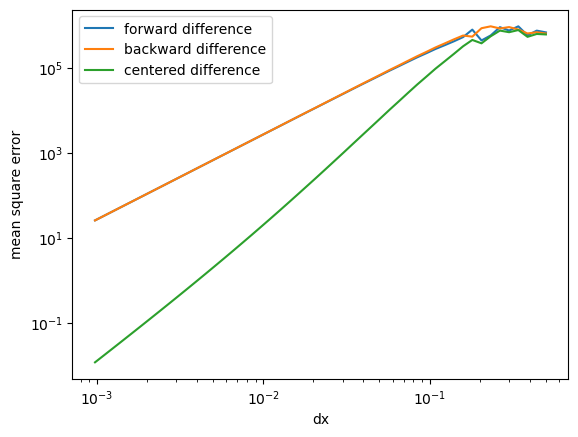

In [15]:
fwd_error = list()
bkd_error = list()
ctr_error = list()

dx_vals = 2**np.linspace(-1, -10, 50)

for dx in dx_vals:
    xvals = np.arange(a, b, dx)
    fvals = np.array(test_fun(xvals))
    fwd_approx = forward_difference(fvals, dx)
    bkd_approx = backward_difference(fvals, dx)
    ctr_approx = centered_difference(fvals, dx)
    # compute the true derivative
    exact = test_fun_deriv(xvals)
    fwd_error.append(np.mean((fwd_approx - exact)**2))
    bkd_error.append(np.mean((bkd_approx - exact)**2))
    ctr_error.append(np.mean((ctr_approx - exact)**2))

plt.loglog(dx_vals, fwd_error, label = 'forward difference')
plt.loglog(dx_vals, bkd_error, label = 'backward difference')
plt.loglog(dx_vals, ctr_error, label = 'centered difference')
plt.legend()
plt.xlabel('dx')
plt.ylabel('mean square error')


## Higher derivatives
We can build up finite difference approximations to higher derivatives by applying them recursively. To approximate the second derivative, we apply a centered difference approximation to $f'$, which we in turn approximate by a centered difference scheme. In order to use data sampled with a spacing of $h$, we form estimates of the first derivative at $x$ values that differ from the central point by half of $h$:

$$
\begin{align}
f''(x) &\approx {f'(x+h/2) - f(x-h/2) \over h}\\
&={1\over h} \left( {f(x+h) - f(x) \over h} - {f(x) - f(x-h) \over h} \right)\\
&={f(x+h) - 2f(x) + f(x-h) \over h^2}
\end{align}
$$

Higher order derivatives can be constructed analogously, with the caveat that numerical errors can accumulate very quickly.

### Endpoints

Just like with the central difference algorithm for first derivatives, the formula shown above can't be applied at the left and right edges of the region where our function is evaluated. If we want an estimate of $f''(a)$ or $f''(b)$, we need to do something else. To see what to do, we can look at the Taylor series approximations of points near $x=a$ (which we suppose is the left endpoint of the region where we've evaluated $f$):

$$
\begin{align*}
f(a) &= f(a)\\
f(a+h) &= f(a) + hf'(a) + {h^2 \over 2!} f''(a) + {h^3 \over 3!} f'''(a) + \dots\\
f(a+2h) &= f(a) + 2hf'(a) + {(2h)^2 \over 2!} f''(a) + {(2h)^3 \over 3!} f'''(a) + \dots\\
\end{align*}
$$

Our goal in numerical differentiation is to combine these function values, $f(a), f(a+h)$, and $f(a+2h)$, to produce an approximation of $f''(a)$. A straighforward calculation reveals that
$$
{f(a) - 2f(a+h) + f(a+2h) \over h^2} = f''(a) - h f'''(a) + \dots
$$
where the $\dots$ represents terms that are proportional to at most $h^2$. We can also recognize that this formula is exactly the finite difference approximation for the second derivative $f''(a+h)$. Therefore one strategy for filling in the "edge cases" $f''(a)$ and $f''(b)$ is to simply use the same value as was computed for $f(a+h)$ or $f(b-h)$, repsectively.

The Taylor series technique shown above can be extended to produce numerical methods that use a greater number of evaluation points and enjoy a greater degree of accuracy.

Below you will write a function that computes the second derivative numerically, and test it out.

In [9]:
def second_derivative_1d(f, dx):
    """
    this function computes the second derivative numerically using finite differences

    INPUT:
        f = array of function values sampled at successive x points (f(a), f(a+dx), f(a+2dx), ...)
        dx = float, the spacing of the grid on which to evaluate the function

    OUTPUT:
        ddf = numpy array giving the values of the second derivative of f with respect to x on the interval [a, b] with spacing dx
    """
    return np.zeros_like(f)

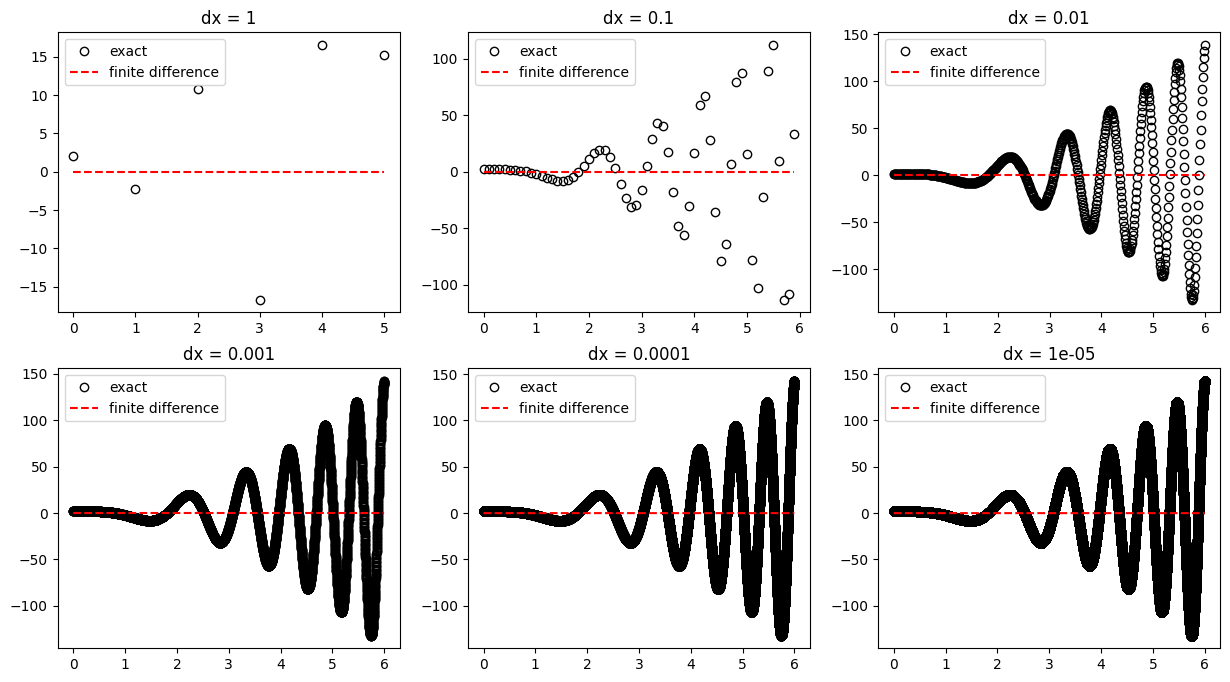

In [10]:
test_fun_3 = lambda x : np.sin(x**2)
# the analytical second derivative of the test function above
test_fun_3_answer = lambda x : 2*np.cos(x**2) - 4*x**2 * np.sin(x**2)

a = 0
b = 6

dx_test_vals = [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

import matplotlib.pyplot as plt
plt.figure(figsize = (15, 8))
for j, dx in enumerate(dx_test_vals):
    xvals = np.arange(a, b, dx)
    fvals = test_fun_3(xvals)
    approx = second_derivative_1d(fvals, dx)
    # compute the true derivative
    exact = test_fun_3_answer(xvals)
    plt.subplot(2, 3, j+1)
    plt.plot(xvals, exact, 'ko', fillstyle='none', label='exact')
    plt.plot(xvals, approx, 'r--', label='finite difference')
    plt.title(f'dx = {dx}')
    plt.legend()


## Higher dimensions
The second derivative, also known as the _Laplacian_, is a very important operator in mathematics, especially PDEs. It is a natural way to model diffusion. For functions of two variables, say $x$ and $y$, the Laplacian $\nabla^2$ is defined as

$$
\nabla^2 f = \partial_{xx} f + \partial_{yy} f
$$

Numerically, one can approximate the Laplacian by adding the numerical approximations of the partial derivatives:

$$
\begin{align}
\nabla^2 f &\approx {f(x+h, y) - 2f(x, y) + f(x-h, y) \over h^2} + {f(x, y+h) - 2f(x,y) + f(x, y-h) \over h^2}\\
&= {f(x+h, y) + f(x-h, y) + f(x, y+h) + f(x, y-h)- 4f(x,y) \over h^2 }
\end{align}
$$

This approximation is known as the _five-point stencil_, since it involves evaluating the function at five points in the vicinity of the point of interest $(x, y)$. It is also possible to use more points to obtain higher accuracy or better performance for rapidly-varying functions, e.g.:

$$
{f(x+h, y+h) + f(x+h, y) + f(x+h, y-h) + f(x, y+h) + f(x, y-h) + f(x-h, y+h) + f(x-h, y) + f(x-h, y-h) - 8 f(x, y) \over 3 h^2}
$$
or

$$
{f(x+h, y+h) + 4f(x+h, y) + f(x+h, y-h) + 4f(x, y+h) + 4f(x, y-h) + f(x-h, y+h) + 4f(x-h, y) + f(x-h, y-h) - 20 f(x, y) \over 6 h^2}
$$

In three dimensions, there are stencils using as few as seven and as many as 27 points.

Below you will write a function that computes the Laplacian of a function of two variables.

In [11]:
def laplacian_2d(f, h):
    """
    this function computes the laplacian of the function f, which was sampled on a square grid with spacing h

    INPUT:
        f = two-dimensional numpy array of shape (N, M)
            f[i,j] = f(x0 + i*h, y0 + j*h)
        h = grid spacing between (x,y) points

    OUTPUT:
        L = two-dimensional numpy array of shape (N, M) giving a finite-difference approximation of the laplacian of f
    """
    return np.zeros_like(f)

<Figure size 640x480 with 0 Axes>

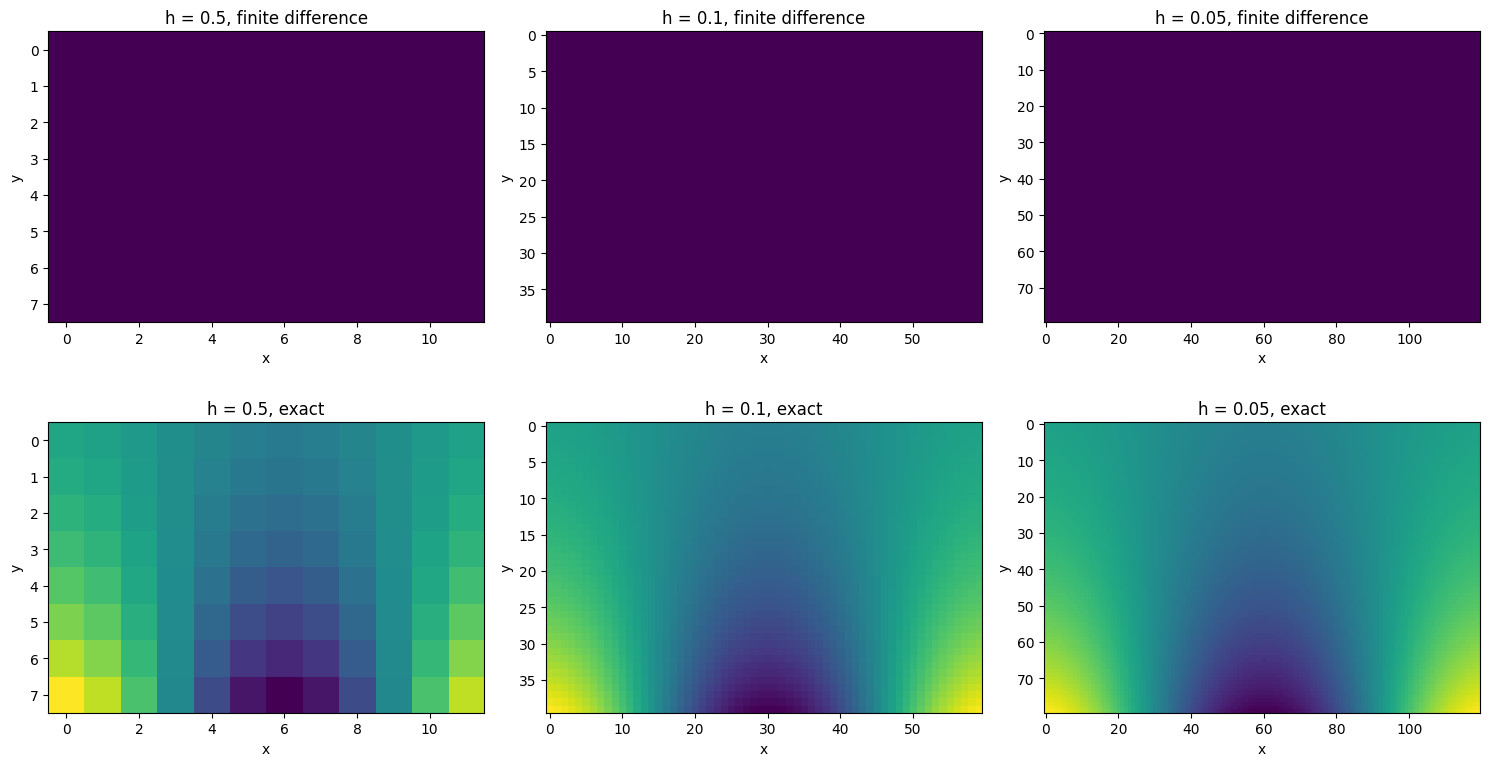

In [12]:
test_fun_2d = lambda x, y : np.cos(x)*np.exp(0.5*y)
test_fun_2d_answer = lambda x, y : -(0.5**2)*np.cos(x)*np.exp(0.5*y)

x0, x1 = -3, 3
y0, y1 = -2, 2


h_test_vals = [5e-1, 1e-1, 5e-2]

import matplotlib.pyplot as plt
fig = plt.figure()
plt.figure(figsize = (15, 8))
for j, h in enumerate(h_test_vals):
    xvals = np.arange(x0, x1, h)
    yvals = np.arange(y0, y1, h)
    X, Y = np.meshgrid(xvals, yvals)
    fvals = test_fun_2d(X, Y)
    approx = laplacian_2d(fvals, h)
    # compute the true derivative
    exact = test_fun_2d_answer(X, Y)
    plt.subplot(2, 3, j+1)
    plt.title(f'h = {h}, finite difference')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(approx)
    plt.subplot(2, 3, j+4)
    plt.title(f'h = {h}, exact')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(exact)
plt.tight_layout()

## Noise
Numerical differentiation is highly susceptible to noise. If a signal is corrupted by noise, the noise can be amplified by a finite difference scheme due to division by the small denominator $h$ or $h^2$. If you have noisy data it is advisable to apply a smoothing operation or otherwise remove the noise before applying a finite difference operation. This is especially relevant when attempting to learn differential equation models from data.

### Denoising with the Fourier Transform
One elegant method of numerically estimating the derivative of noisy data is to use the Fourier transform. The Fourier transform is defined by:

$$
\hat{f}(\omega) = {1\over \sqrt{2\pi}}\int_{-\infty}^{\infty} \exp(-i\omega t) f(t) dt
$$
and its inverse:
$$
f(t) = {1\over \sqrt{2\pi}}\int_{-\infty}^{\infty} \exp(i\omega t) \hat{f}(\omega) d\omega
$$

The quantity $\hat{f}(\omega)$ quantifies the amount of a frequency-$\omega$ signal that comprises the temporal signal $f(t)$. In many cases, noise in a signal is not correlated in time, and so it shows up in the Fourier transform as a high-frequency component. This gives rise to a simple strategy for denoising, which is to remove the high-frequency components of the signal:
$$
\tilde{f}(t) = {1\over \sqrt{2\pi}} \int_{-\omega_c}^{\omega_c} \exp(i\omega t)\hat{f}(\omega) d\omega
$$
where $\omega_c$ is a *cutoff frequency*. Choosing the cutoff frequency appropriately is very important to the quality of the denoising, and requires care and knowledge of the source of the signal in question.

The reason the Fourier transform is useful for numerical differentiation is because of the special relationship between differentiation and the Fourier transform; one way to formally state it is that "the Fourier transform diagonalizes differentiation". It can be shown using integration by parts that:
$$
\begin{align}
\hat{f'} &= {1\over \sqrt{2\pi}}\int_{-\infty}^{\infty} \exp(-i\omega t) f'(t) dt\\
&= {1\over\sqrt{2\pi}} \left( f(t) \exp(-i\omega t)\vert^{\infty}_{-\infty} - \int_{-\infty}^{\infty} -i\omega \exp(-i\omega t) f(t) dt\right)\\
&= {1\over\sqrt{2\pi}}\int_{-\infty}^{\infty} i\omega \exp(-i\omega t) f(t) dt\\
&= i\omega \hat{f}(\omega)
\end{align}
$$
where we have assumed that $f(t)\to 0$ as $t\to\pm\infty$. In words, the Fourier transform of the derivative of a function is equal to $i\omega$ times the Fourier transform of that function. We can use this to get an approximation of the derivative of our denoised signal as such:
$$
\tilde{f'} = {1\over \sqrt{2\pi}} \int_{-\omega_c}^{\omega_c} i\omega \exp(i\omega t) \hat{f}(\omega) d\omega
$$

**Exercise**: Show that $\tilde{f'}$ as defined above is indeed purely real-valued (i.e. has zero imaginary part). You will need to deduce and use some facts about $\hat{f}$ that follow from the fact that $f(t)$ is real-valued.

#### Implementation

The above derivation assumes that the function $f$ is continuous and defined for all real numbers $x$. In a computer, we always deal with a discrete version of $f$, usually samples $f(x_0), \dots, f(x_{N-1})$. The Fourier transform applied to such data is usually called the Discrete Fourier Transform (DFT), and it is usually implemented via an algorithm known as the Fast Fourier Transform (FFT). The DFT is defined as

$$
F_k = \sum_{n=0}^{N-1} f_n \exp(i 2\pi kn / N)
$$

for values of $k$ ranging from $0$ to $N-1$. If implemented directly, this algorithm requires $\mathcal{O}(N^2)$ multiplications, but the FFT algorithm reduces it to $\mathcal{O}(N\log(N))$!

The FFT algorithm is available in NumPy: [https://numpy.org/doc/stable/reference/routines.fft.html]

### Denoising by smoothing

Another approach to estimating the derivative of noisy data is to apply a smoothing operation before applying the finite difference operation. The most basic smoothing operation is a *moving average*, which replaces the values $f(x)$ by an average of values $f(x')$ for $x'$ close to $x$. In the case of a discretely sampled function, this can be specified by choosing a number of points to the left and right of the focal point.

$$
SMA(i, k) ={1\over 2k+1} \sum_{n = -k}^{k} f(x_{i+n})
$$

The above formula is known as a *simple* moving average (hence SMA), because each point counts equally in the average. It is also possible to use a *weight function* $w(n)$ that specifies how much each neighboring point should count in the estimate of the de-noised value. A weighted moving average can be defined as follows:

$$
MA(i, k, w) = {1 \over 2k+1} \sum_{n=-k}^{k} f(x_{i+n}) w(n)
$$

**Exercise**

The code below defines a simple function $f(x) = x^3 - x$, samples its value at an array of $x$ points, and adds noise.

1. Apply finite differences as you did before to the noisy data and compare the result to the true derivative $f'(x)$
2. Use a smoothing technique, either with or without the Fourier transform, to improve your estimate of the derivative.
3. Experiment with different values of $N$, noise strength, and smoothing parameters to see how they affect the results.

In [28]:
test_fun_noise = lambda x : x**3 - x
test_fun_noise_derivative = lambda x : 3*x**2 -1

a, b = -3/2, 3/2
N = 1000
noise_level = 1e-2

xvals = np.linspace(a, b, N)
dx = xvals[1] - xvals[0]
fvals = test_fun_noise(xvals)

noise = np.random.randn(N) * noise_level

fnoisy = fvals + noise

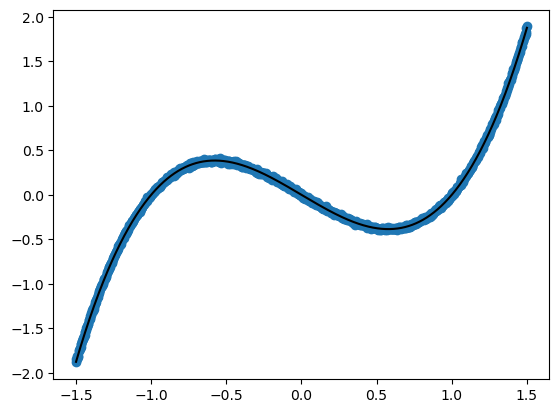

In [29]:
plt.scatter(xvals, fnoisy)
plt.plot(xvals, fvals, 'k')

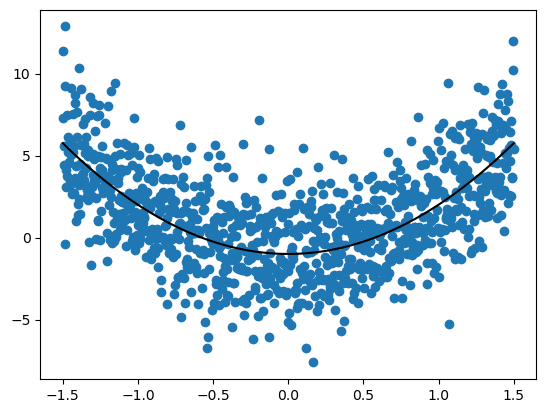

In [30]:
plt.scatter(xvals, centered_difference(fnoisy, dx))
plt.plot(xvals, test_fun_noise_derivative(xvals), 'k')
# bad!

In [31]:
def simple_moving_average(f, window = 10):
    sma = np.zeros_like(f)
    n = len(f)
    for i in range(n):
        if i-window < 0:
            sma[i] = np.mean(f[:i+window])
        elif n-i < window:
            sma[i] = np.mean(f[i-window:])
        else:
            sma[i] = np.mean(f[i-window:i+window])
    return sma

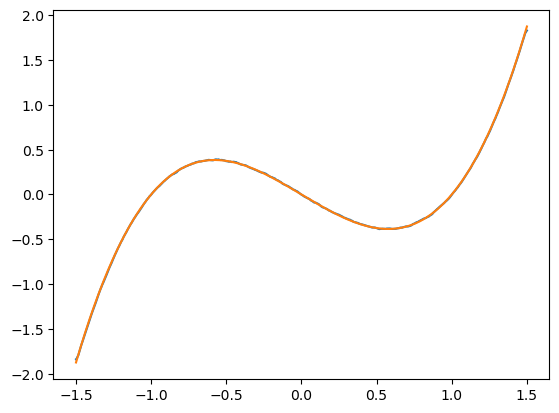

In [36]:
plt.plot(xvals, simple_moving_average(fnoisy, window=5))
plt.plot(xvals, fvals)

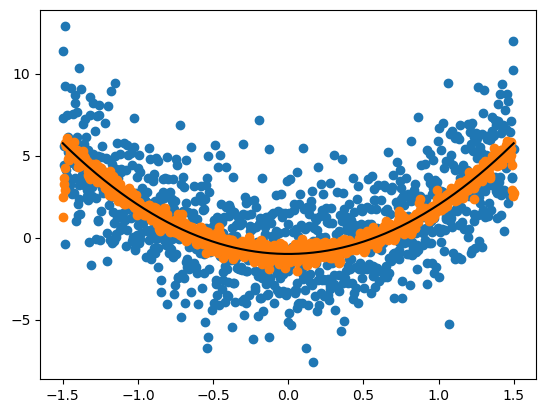

In [42]:
plt.scatter(xvals, centered_difference(fnoisy, dx), label='no smoothing')
plt.scatter(xvals, centered_difference(simple_moving_average(fnoisy, window=5), dx), label='simple moving average')
plt.plot(xvals, test_fun_noise_derivative(xvals),'k', label='true')